#### Importing the required libraries for plotting.

In [1]:
import pandas as pn
import matplotlib.pyplot as plt
import plotly.express as px

Reading the superset long format dataset and displaying it.

In [2]:
superset_long = pn.read_csv("../../../../data/stage_2/superset_long.csv")
superset_long

,countyFIPS,State,County Name,StateFIPS,population,Date,Deaths,Cases
0,1001,AL,Autauga County,1,55869,1/22/2020,0,0
1,1003,AL,Baldwin County,1,223234,1/22/2020,0,0
2,1005,AL,Barbour County,1,24686,1/22/2020,0,0
3,1007,AL,Bibb County,1,22394,1/22/2020,0,0
4,1009,AL,Blount County,1,57826,1/22/2020,0,0
...,...,...,...,...,...,...,...,...
1800361,56037,WY,Sweetwater County,56,42343,8/16/2021,45,5127
1800362,56039,WY,Teton County,56,23464,8/16/2021,11,4068
1800363,56041,WY,Uinta County,56,20226,8/16/2021,14,2593
1800364,56043,WY,Washakie County,56,7805,8/16/2021,26,967


#### Selecting Indiana Data from superset.

In [3]:
Indiana_df = superset_long[superset_long['StateFIPS'] == 18]

#### Calculating new cases and new deaths per day in Indiana. Removing NaN values.

In [4]:
Indiana_df['New_cases_per_day'] = Indiana_df.groupby('countyFIPS').Cases.diff()
Indiana_df['New_deaths_per_day'] = Indiana_df.groupby('countyFIPS').Deaths.diff()
Indiana_df = Indiana_df.dropna()
Indiana_df

<ipython-input-4-bd644a4fb47d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Indiana_df['New_cases_per_day'] = Indiana_df.groupby('countyFIPS').Cases.diff()
<ipython-input-4-bd644a4fb47d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Indiana_df['New_deaths_per_day'] = Indiana_df.groupby('countyFIPS').Deaths.diff()


,countyFIPS,State,County Name,StateFIPS,population,Date,Deaths,Cases,New_cases_per_day,New_deaths_per_day
3839,18001,IN,Adams County,18,35777,1/23/2020,0,0,0.0,0.0
3840,18003,IN,Allen County,18,379299,1/23/2020,0,0,0.0,0.0
3841,18005,IN,Bartholomew County,18,83779,1/23/2020,0,0,0.0,0.0
3842,18007,IN,Benton County,18,8748,1/23/2020,0,0,0.0,0.0
3843,18009,IN,Blackford County,18,11758,1/23/2020,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1798008,18175,IN,Washington County,18,28036,8/16/2021,40,2682,29.0,1.0
1798009,18177,IN,Wayne County,18,65884,8/16/2021,206,7869,62.0,0.0
1798010,18179,IN,Wells County,18,28296,8/16/2021,83,3218,40.0,0.0
1798011,18181,IN,White County,18,24102,8/16/2021,55,3488,12.0,0.0


In [5]:
Indiana_df['Date'] = pn.to_datetime(Indiana_df['Date'])

#### Calculating number of new cses and new deaths per week for Indiana.

In [6]:
IN_weeklyData = Indiana_df.groupby([ pn.Grouper(key='Date', freq='w'),'countyFIPS'])['New_cases_per_day','New_deaths_per_day'].agg({'New_cases_per_day':'mean',
                                                                                                'New_deaths_per_day' :'mean'}).reset_index().round(decimals=0)
IN_weeklyData

<ipython-input-6-10ec8ee5bf56>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  IN_weeklyData = Indiana_df.groupby([ pn.Grouper(key='Date', freq='w'),'countyFIPS'])['New_cases_per_day','New_deaths_per_day'].agg({'New_cases_per_day':'mean',


,Date,countyFIPS,New_cases_per_day,New_deaths_per_day
0,2020-01-26,18001,0.0,0.0
1,2020-01-26,18003,0.0,0.0
2,2020-01-26,18005,0.0,0.0
3,2020-01-26,18007,0.0,0.0
4,2020-01-26,18009,0.0,0.0
...,...,...,...,...
7631,2021-08-22,18175,29.0,1.0
7632,2021-08-22,18177,62.0,0.0
7633,2021-08-22,18179,40.0,0.0
7634,2021-08-22,18181,12.0,0.0


 #### Weekly statistics for number of new cases and deaths across a specific state.

In [7]:
week_cases_mean = IN_weeklyData['New_cases_per_day'].mean()
week_cases_median = IN_weeklyData['New_cases_per_day'].median()
week_cases_mode = IN_weeklyData['New_cases_per_day'].mode()

print('Mean of Weekly New Cases in Indiana: ', week_cases_mean)
print('Median of Weekly New Cases in Indiana: ', week_cases_median)
print('Mode of Weekly New Cases in Indiana: ', week_cases_mode)

Mean of Weekly New Cases in Indiana:  15.839968569931901
Median of Weekly New Cases in Indiana:  3.0
Mode of Weekly New Cases in Indiana:  0    0.0
dtype: float64


In [8]:
week_deaths_mean = IN_weeklyData['New_deaths_per_day'].mean()
week_deaths_median = IN_weeklyData['New_deaths_per_day'].median()
week_deaths_mode = IN_weeklyData['New_deaths_per_day'].mode()

print('Mean of Weekly New Deaths in Indiana: ', week_deaths_mean)
print('Median of Weekly New Deaths in Indiana: ', week_deaths_median)
print('Mode of Weekly New Deaths in Indiana: ', week_deaths_mode)

Mean of Weekly New Deaths in Indiana:  0.22446306966998428
Median of Weekly New Deaths in Indiana:  0.0
Mode of Weekly New Deaths in Indiana:  0    0.0
dtype: float64


#### Calculating new Cases and Deaths per day for all the counties of US and normalizing data to 100,000.  Adding it to new rows.

In [9]:
superset_long['Date'] = pn.to_datetime(superset_long['Date'])

In [10]:
superset_long['New_cases_per_day'] = superset_long.groupby('countyFIPS').Cases.diff()
superset_long['New_deaths_per_day'] = superset_long.groupby('countyFIPS').Deaths.diff()
superset_long['Normalized_new_cases_per_day'] = (superset_long['New_cases_per_day']/superset_long['population']) * 100000
superset_long['Normalized_new_deaths_per_day'] = (superset_long['New_deaths_per_day']/superset_long['population']) * 100000
superset_long = superset_long.dropna()
superset_long

,countyFIPS,State,County Name,StateFIPS,population,Date,Deaths,Cases,New_cases_per_day,New_deaths_per_day,Normalized_new_cases_per_day,Normalized_new_deaths_per_day
3142,1001,AL,Autauga County,1,55869,2020-01-23,0,0,0.0,0.0,0.0,0.0
3143,1003,AL,Baldwin County,1,223234,2020-01-23,0,0,0.0,0.0,0.0,0.0
3144,1005,AL,Barbour County,1,24686,2020-01-23,0,0,0.0,0.0,0.0,0.0
3145,1007,AL,Bibb County,1,22394,2020-01-23,0,0,0.0,0.0,0.0,0.0
3146,1009,AL,Blount County,1,57826,2020-01-23,0,0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1800361,56037,WY,Sweetwater County,56,42343,2021-08-16,45,5127,0.0,0.0,0.0,0.0
1800362,56039,WY,Teton County,56,23464,2021-08-16,11,4068,0.0,0.0,0.0,0.0
1800363,56041,WY,Uinta County,56,20226,2021-08-16,14,2593,0.0,0.0,0.0,0.0
1800364,56043,WY,Washakie County,56,7805,2021-08-16,26,967,0.0,0.0,0.0,0.0


Calculating weekly cases using normalised cases and deaths per day.

In [11]:
US_weeklyData = superset_long.groupby([ pn.Grouper(key='Date', freq='w'),'countyFIPS','StateFIPS'])['Normalized_new_cases_per_day','Normalized_new_deaths_per_day'].agg({'Normalized_new_cases_per_day':'mean',
                                                                                                'Normalized_new_deaths_per_day' :'mean'}).reset_index().round(decimals=0)
US_weeklyData

<ipython-input-11-d3fb154fa83c>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  US_weeklyData = superset_long.groupby([ pn.Grouper(key='Date', freq='w'),'countyFIPS','StateFIPS'])['Normalized_new_cases_per_day','Normalized_new_deaths_per_day'].agg({'Normalized_new_cases_per_day':'mean',


,Date,countyFIPS,StateFIPS,Normalized_new_cases_per_day,Normalized_new_deaths_per_day
0,2020-01-26,1001,1,0.0,0.0
1,2020-01-26,1003,1,0.0,0.0
2,2020-01-26,1005,1,0.0,0.0
3,2020-01-26,1007,1,0.0,0.0
4,2020-01-26,1009,1,0.0,0.0
...,...,...,...,...,...
260781,2021-08-22,56037,56,0.0,0.0
260782,2021-08-22,56039,56,0.0,0.0
260783,2021-08-22,56041,56,0.0,0.0
260784,2021-08-22,56043,56,0.0,0.0


Creating a new dataframe to store the weekly stats of each county.

In [12]:
US_state_weeklydata = pn.DataFrame(columns = ('Date', 'StateFIPS', 
                                              'Mean_Nomalized_new_cases_week', 'Mean_Nomalized_new_deaths_week',
                                              'Median_Nomalized_new_cases_week', 'Median_Nomalized_new_deaths_week',
                                              'Mode_Nomalized_new_cases_week', 'Mode_Nomalized_new_deaths_week',
                                             ))

Calculating mean, median and mode for each county and appending to the above created DataFrame.

In [13]:
for i in US_weeklyData['StateFIPS'].unique():
    mean_cases = US_weeklyData[US_weeklyData['StateFIPS'] == i]['Normalized_new_cases_per_day'].mean()
    mean_deaths = US_weeklyData[US_weeklyData['StateFIPS'] == i]['Normalized_new_deaths_per_day'].mean()
    median_cases = US_weeklyData[US_weeklyData['StateFIPS'] == i]['Normalized_new_cases_per_day'].median()
    median_deaths = US_weeklyData[US_weeklyData['StateFIPS'] == i]['Normalized_new_deaths_per_day'].median()
    mode_cases = US_weeklyData[US_weeklyData['StateFIPS'] == i]['Normalized_new_cases_per_day'].mode()
    mode_deaths = US_weeklyData[US_weeklyData['StateFIPS'] == i]['Normalized_new_deaths_per_day'].mode()
    Data = { 'StateFIPS': i, 
            'Mean_Nomalized_new_cases_week': mean_cases, 'Mean_Nomalized_new_deaths_week': mean_deaths,
            'Median_Nomalized_new_cases_week': median_cases, 'Median_Nomalized_new_deaths_week': median_deaths,
            'Mode_Nomalized_new_cases_week': mode_cases, 'Mode_Nomalized_new_deaths_week': mode_deaths,
           }
    US_state_weeklydata = US_state_weeklydata.append(Data,ignore_index=True)

In [14]:
US_state_weeklydata['Mode_Nomalized_new_cases_week'] = US_state_weeklydata['Mode_Nomalized_new_cases_week'].astype(str)
US_state_weeklydata['Mode_Nomalized_new_deaths_week'] = US_state_weeklydata['Mode_Nomalized_new_deaths_week'].astype(str)


US_state_weeklydata['Mode_Nomalized_new_cases_week'] = US_state_weeklydata['Mode_Nomalized_new_cases_week'].str[:4]
US_state_weeklydata['Mode_Nomalized_new_deaths_week'] = US_state_weeklydata['Mode_Nomalized_new_deaths_week'].str[:4]

#### Plotting mean, median and mode of each state's normalized new cases and deaths per week.

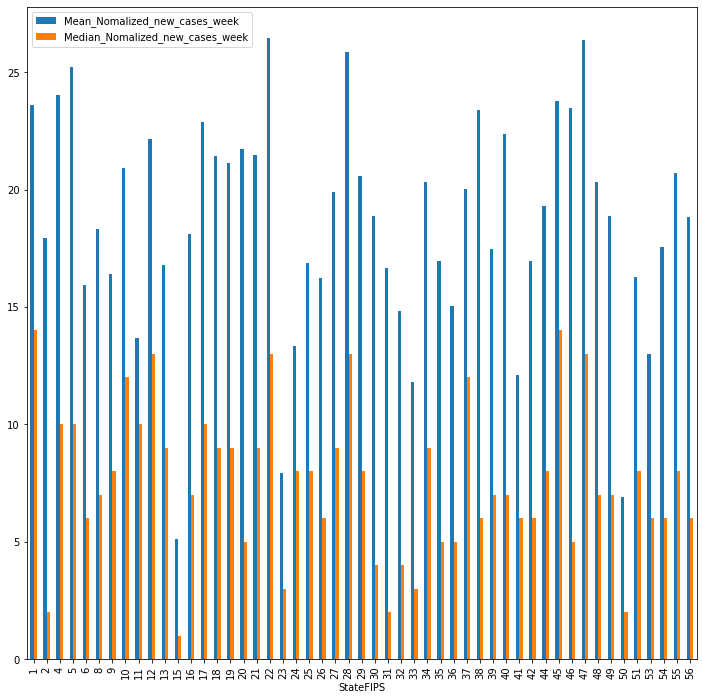

In [15]:
US_state_weeklydata.plot(x = 'StateFIPS', y=['Mean_Nomalized_new_cases_week','Median_Nomalized_new_cases_week','Mode_Nomalized_new_cases_week'], kind='bar',figsize=(12,12))
plt.show("png")

### Identify counties within the previous state with high case and death rates. (normalize by population)

Finding the latest date available in DataFrame

In [16]:
Latest_date = Indiana_df['Date'].max()
Latest_date

Timestamp('2021-08-16 00:00:00')

Calulating population of Indiana state using aggregation.

In [17]:
Indiana_population = Indiana_df[Indiana_df['Date'] == Latest_date]['population'].sum()
Indiana_population

6732219

In [18]:
Indiana_df

,countyFIPS,State,County Name,StateFIPS,population,Date,Deaths,Cases,New_cases_per_day,New_deaths_per_day
3839,18001,IN,Adams County,18,35777,2020-01-23,0,0,0.0,0.0
3840,18003,IN,Allen County,18,379299,2020-01-23,0,0,0.0,0.0
3841,18005,IN,Bartholomew County,18,83779,2020-01-23,0,0,0.0,0.0
3842,18007,IN,Benton County,18,8748,2020-01-23,0,0,0.0,0.0
3843,18009,IN,Blackford County,18,11758,2020-01-23,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1798008,18175,IN,Washington County,18,28036,2021-08-16,40,2682,29.0,1.0
1798009,18177,IN,Wayne County,18,65884,2021-08-16,206,7869,62.0,0.0
1798010,18179,IN,Wells County,18,28296,2021-08-16,83,3218,40.0,0.0
1798011,18181,IN,White County,18,24102,2021-08-16,55,3488,12.0,0.0


Calculating rate of cases and deaths for each county. Then normalising the data to the total population of the state.

In [19]:
Indiana_test = Indiana_df[Indiana_df['Date'] == Latest_date]
Indiana_test = Indiana_test.drop(columns=['New_cases_per_day', 'New_deaths_per_day'])
Indiana_test['Cases_Rate'] = round((Indiana_test['Cases']/Indiana_test['population'])*Indiana_population,2)
Indiana_test['Deaths_Rate'] = round((Indiana_test['Deaths']/Indiana_test['population'])*Indiana_population,2)

#### Details of county with maximum cases rate in Indiana.

In [20]:
Indiana_test[Indiana_test['Cases_Rate'] == Indiana_test['Cases_Rate'].max()]

,countyFIPS,State,County Name,StateFIPS,population,Date,Deaths,Cases,Cases_Rate,Deaths_Rate
1797929,18017,IN,Cass County,18,37689,2021-08-16,115,6300,1125341.07,20541.94


#### Details of county that have maximum death rate in Indiana.

In [21]:
Indiana_test[Indiana_test['Deaths_Rate'] == Indiana_test['Deaths_Rate'].max()]

,countyFIPS,State,County Name,StateFIPS,population,Date,Deaths,Cases,Cases_Rate,Deaths_Rate
1797986,18131,IN,Pulaski County,18,12353,2021-08-16,50,1287,701397.71,27249.33


Sorting the values in ascending order based on the cases rate to find the top 5 infected counties

In [22]:
Indiana_test = Indiana_test.sort_values(by='Cases_Rate', ascending = False)

#### Details of top 5 infected counties in Indiana

In [23]:
Indiana_top5 = Indiana_test.head(5)
Indiana_top5

,countyFIPS,State,County Name,StateFIPS,population,Date,Deaths,Cases,Cases_Rate,Deaths_Rate
1797929,18017,IN,Cass County,18,37689,2021-08-16,115,6300,1125341.07,20541.94
1797939,18037,IN,Dubois County,18,42736,2021-08-16,119,6531,1028831.02,18746.12
1797943,18045,IN,Fountain County,18,16346,2021-08-16,51,2489,1025112.75,21004.72
1797932,18023,IN,Clinton County,18,32399,2021-08-16,64,4818,1001136.80,13298.62
1797940,18039,IN,Elkhart County,18,206341,2021-08-16,490,30444,993286.24,15987.07


Daily cases and deaths of the above counties

In [24]:
Top5_counties = Indiana_df[Indiana_df['countyFIPS'].isin([18017, 18037,18045,18023,18039])].reset_index()
Top5_counties

,index,countyFIPS,State,County Name,StateFIPS,population,Date,Deaths,Cases,New_cases_per_day,New_deaths_per_day
0,3847,18017,IN,Cass County,18,37689,2020-01-23,0,0,0.0,0.0
1,3850,18023,IN,Clinton County,18,32399,2020-01-23,0,0,0.0,0.0
2,3857,18037,IN,Dubois County,18,42736,2020-01-23,0,0,0.0,0.0
3,3858,18039,IN,Elkhart County,18,206341,2020-01-23,0,0,0.0,0.0
4,3861,18045,IN,Fountain County,18,16346,2020-01-23,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2855,1797929,18017,IN,Cass County,18,37689,2021-08-16,115,6300,36.0,1.0
2856,1797932,18023,IN,Clinton County,18,32399,2021-08-16,64,4818,37.0,0.0
2857,1797939,18037,IN,Dubois County,18,42736,2021-08-16,119,6531,30.0,0.0
2858,1797940,18039,IN,Elkhart County,18,206341,2021-08-16,490,30444,89.0,0.0


Normalizing the cases and deaths per day to 100000.

In [25]:
Top5_counties['New_cases_per_day'] = round((Top5_counties['New_cases_per_day']/Top5_counties['population'])*100000,2)
Top5_counties['New_deaths_per_day'] = round((Top5_counties['New_deaths_per_day']/Top5_counties['population'])*100000,2)
Top5_counties = Top5_counties.drop(columns= ['index','State', 'countyFIPS', 'StateFIPS', 'population'])
Top5_counties


,County Name,Date,Deaths,Cases,New_cases_per_day,New_deaths_per_day
0,Cass County,2020-01-23,0,0,0.00,0.00
1,Clinton County,2020-01-23,0,0,0.00,0.00
2,Dubois County,2020-01-23,0,0,0.00,0.00
3,Elkhart County,2020-01-23,0,0,0.00,0.00
4,Fountain County,2020-01-23,0,0,0.00,0.00
...,...,...,...,...,...,...
2855,Cass County,2021-08-16,115,6300,95.52,2.65
2856,Clinton County,2021-08-16,64,4818,114.20,0.00
2857,Dubois County,2021-08-16,119,6531,70.20,0.00
2858,Elkhart County,2021-08-16,490,30444,43.13,0.00


Calculating total cases and deaths per day in Indiana state and normalizing it to 100000.

In [26]:
Indiana_total = Indiana_df.groupby('Date').sum().reset_index()
Indiana_total['New_cases_per_day'] = round((Indiana_total['New_cases_per_day']/Indiana_total['population'])*100000,2)
Indiana_total['New_deaths_per_day'] = round((Indiana_total['New_deaths_per_day']/Indiana_total['population'])*100000,2)
Indiana_total

,Date,countyFIPS,StateFIPS,population,Deaths,Cases,New_cases_per_day,New_deaths_per_day
0,2020-01-23,1664464,1656,6732219,0,0,0.00,0.00
1,2020-01-24,1664464,1656,6732219,0,0,0.00,0.00
2,2020-01-25,1664464,1656,6732219,0,0,0.00,0.00
3,2020-01-26,1664464,1656,6732219,0,0,0.00,0.00
4,2020-01-27,1664464,1656,6732219,0,0,0.00,0.00
...,...,...,...,...,...,...,...,...
567,2021-08-12,1664464,1656,6732219,14116,797712,46.82,0.09
568,2021-08-13,1664464,1656,6732219,14128,800367,39.44,0.18
569,2021-08-14,1664464,1656,6732219,14128,800367,0.00,0.00
570,2021-08-15,1664464,1656,6732219,14128,800367,0.00,0.00


In [27]:
Indiana_total = Indiana_total[['Date', 'Deaths', 'Cases', 'New_cases_per_day', 'New_deaths_per_day']]
Indiana_total['County Name'] = 'Indiana'
Indiana_total

<ipython-input-27-aa1d7c825c63>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Indiana_total['County Name'] = 'Indiana'


,Date,Deaths,Cases,New_cases_per_day,New_deaths_per_day,County Name
0,2020-01-23,0,0,0.00,0.00,Indiana
1,2020-01-24,0,0,0.00,0.00,Indiana
2,2020-01-25,0,0,0.00,0.00,Indiana
3,2020-01-26,0,0,0.00,0.00,Indiana
4,2020-01-27,0,0,0.00,0.00,Indiana
...,...,...,...,...,...,...
567,2021-08-12,14116,797712,46.82,0.09,Indiana
568,2021-08-13,14128,800367,39.44,0.18,Indiana
569,2021-08-14,14128,800367,0.00,0.00,Indiana
570,2021-08-15,14128,800367,0.00,0.00,Indiana


Concatinating both the dataframes.

In [28]:
Indiana_total = pn.concat([Top5_counties, Indiana_total])
Indiana_total

,County Name,Date,Deaths,Cases,New_cases_per_day,New_deaths_per_day
0,Cass County,2020-01-23,0,0,0.00,0.00
1,Clinton County,2020-01-23,0,0,0.00,0.00
2,Dubois County,2020-01-23,0,0,0.00,0.00
3,Elkhart County,2020-01-23,0,0,0.00,0.00
4,Fountain County,2020-01-23,0,0,0.00,0.00
...,...,...,...,...,...,...
567,Indiana,2021-08-12,14116,797712,46.82,0.09
568,Indiana,2021-08-13,14128,800367,39.44,0.18
569,Indiana,2021-08-14,14128,800367,0.00,0.00
570,Indiana,2021-08-15,14128,800367,0.00,0.00


### Plot of normalized cases per day of top 5 counties and the Indiana state

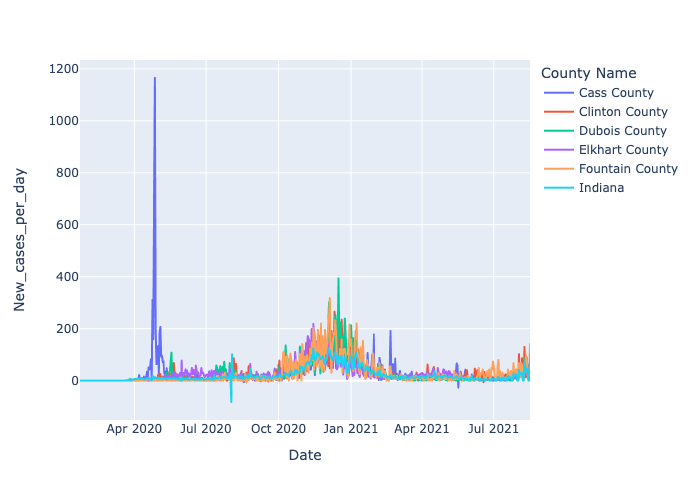

In [29]:
Indiana_cases_plot = px.line(Indiana_total, x ='Date', y='New_cases_per_day', color='County Name')
Indiana_cases_plot.show("png")

### Plot of normalized deaths per day of top 5 counties and the Indiana state

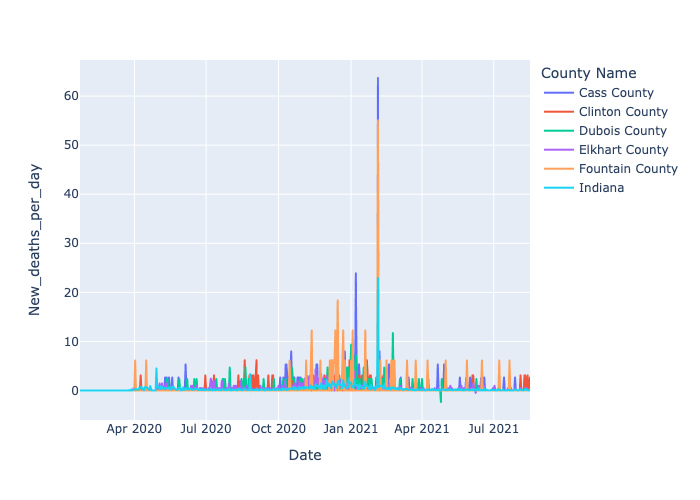

In [30]:
Indiana_deaths_plot = px.line(Indiana_total, x ='Date', y='New_deaths_per_day', color='County Name')
Indiana_deaths_plot.show("png")